<a href="https://colab.research.google.com/github/prachinikhare/Machine-Learning-Projects/blob/main/Classification_MNIST_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HANDWRITTEN DIGIT RECOGNITION ON MNIST DATASET**

**Fetching Dataset**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [2]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [3]:
x,y = mnist['data'],mnist["target"]

In [4]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

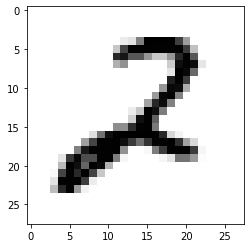

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28) # lets reshape it to plot it
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")

(0.0, 1.0, 0.0, 1.0)

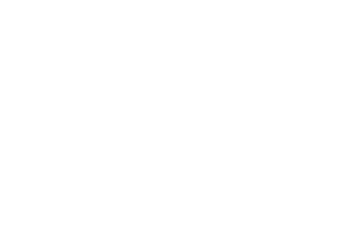

In [10]:
plt.axis("off")

In [11]:
y[36001]

'2'

In [12]:
x_train = x[:60000]
x_test = x[60000:]

In [13]:
y_train = y[:60000]
y_test = y[60000:]

In [14]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]

**Creating a 2 Detector**

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 =(y_train == 2)
y_test_2 =(y_test == 2)
y_train_2

array([False, False, False, ..., False, False, False])

In [16]:
y_train

array([5, 8, 9, ..., 5, 7, 6], dtype=int8)

In [17]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1)
clf.fit(x_train,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [19]:
clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring = "accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
a.mean()

0.9778500000000001

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,x_train,y_train_2,cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [24]:
y_train_pred

array([False, False, False, ..., False, False, False])

**Calculating Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2,y_train_pred)

array([[53552,   490],
       [  839,  5119]])

In [26]:
confusion_matrix(y_train_2,y_train_2) # This is the confusion matrix for perfect predictions

array([[54042,     0],
       [    0,  5958]])

**Precision and Recall**

In [28]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_2,y_train_pred)# This is my precision score

0.9126403993581743

In [29]:
recall_score(y_train_2,y_train_pred)# This is my recall score

0.8591809331990601

**F1-Score**

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train_2,y_train_pred)# This is my f1-score

0.8851041756721708

**Precision Recall Curve**

In [39]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(clf,x_train,y_train_2,cv=3,method = "decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
y_scores

array([-16.18790385,  -7.86783977, -19.74252245, ..., -14.8245531 ,
       -26.44545501,  -9.02209892])

In [41]:
precisions,recalls,thresholds = precision_recall_curve(y_train_2,y_scores)

In [42]:
precisions

array([0.10055017, 0.10053499, 0.10053669, ..., 1.        , 1.        ,
       1.        ])

In [43]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [44]:
thresholds

array([-25.83956428, -25.8356513 , -25.83061341, ...,  18.77084254,
        19.85483751,  20.09145893])

**Plotting the Precision Recall Curve**

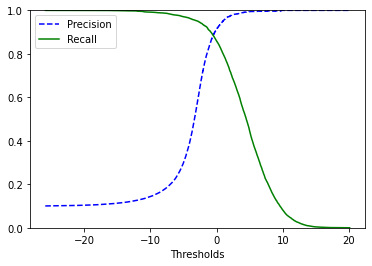

In [48]:
plt.plot(thresholds,precisions[:-1],"b--",label = "Precision")
plt.plot(thresholds,recalls[:-1],"g-",label = "Recall")
plt.xlabel("Thresholds")
plt.legend(loc = "upper left")
plt.ylim([0,1])
plt.show()